In [17]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
file_path="smoke_detection_iot.csv"
df=pd.read_csv(file_path)

In [19]:
# Make a copy of the dataset
smoke_df = df.copy()

In [20]:
smoke_df = pd.read_csv("smoke_detection_iot.csv")

In [21]:
smoke_df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [22]:
numberofrows_1, numberofcolumns_1 = smoke_df.shape
print('There are {} rows and {} columns'.format(numberofrows_1, numberofcolumns_1)+' in our smoke Dataset.')

There are 62630 rows and 16 columns in our smoke Dataset.


In [23]:
smoke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [24]:
smoke_df.dtypes

Unnamed: 0          int64
UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

In [25]:
smoke_df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [40]:
print('There are {} rows and {} columns'.format(smoke_df.shape[0], smoke_df.shape[1])+' in our modified smoke Dataset.')

There are 62630 rows and 16 columns in our modified smoke Dataset.


In [27]:
smoke_df.nunique().to_frame(name = 'Unique Values')

,Unique Values
Unnamed: 0,62630
UTC,62630
Temperature[C],21672
Humidity[%],3890
TVOC[ppb],1966
eCO2[ppm],1713
Raw H2,1830
Raw Ethanol,2659
Pressure[hPa],2213
PM1.0,1337


In [28]:
smoke_df['Temperature[C]'].value_counts().to_frame(name = 'Count').head()

,Count
24.48,222
24.51,206
24.47,193
26.95,191
26.98,189


In [29]:
# Generate count statistics of duplicate entries

if (len(smoke_df[smoke_df.duplicated()]) > 0):
    print('No. of duplicated entries: ', len(smoke_df[smoke_df.duplicated()]))
    print(smoke_df[smoke_df.duplicated(keep = False)].sort_values(by = list(smoke_df.columns)).head())
else:
    print('No duplicated entries found.')

No duplicated entries found.


In [30]:
smoke_df.shape

(62630, 16)

<AxesSubplot:xlabel='Raw H2', ylabel='Count'>

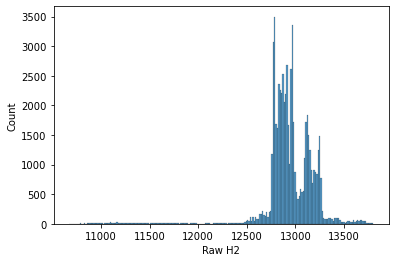

In [35]:
sns.histplot(x='Raw H2', data=smoke_df,kde=False)

<AxesSubplot:xlabel='Raw H2', ylabel='Count'>

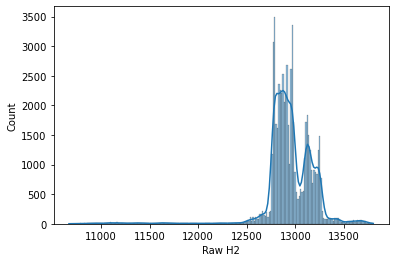

In [36]:
sns.histplot(x='Raw H2', data=smoke_df,kde=True)

ValueError: num must be 1 <= num <= 9, not 10

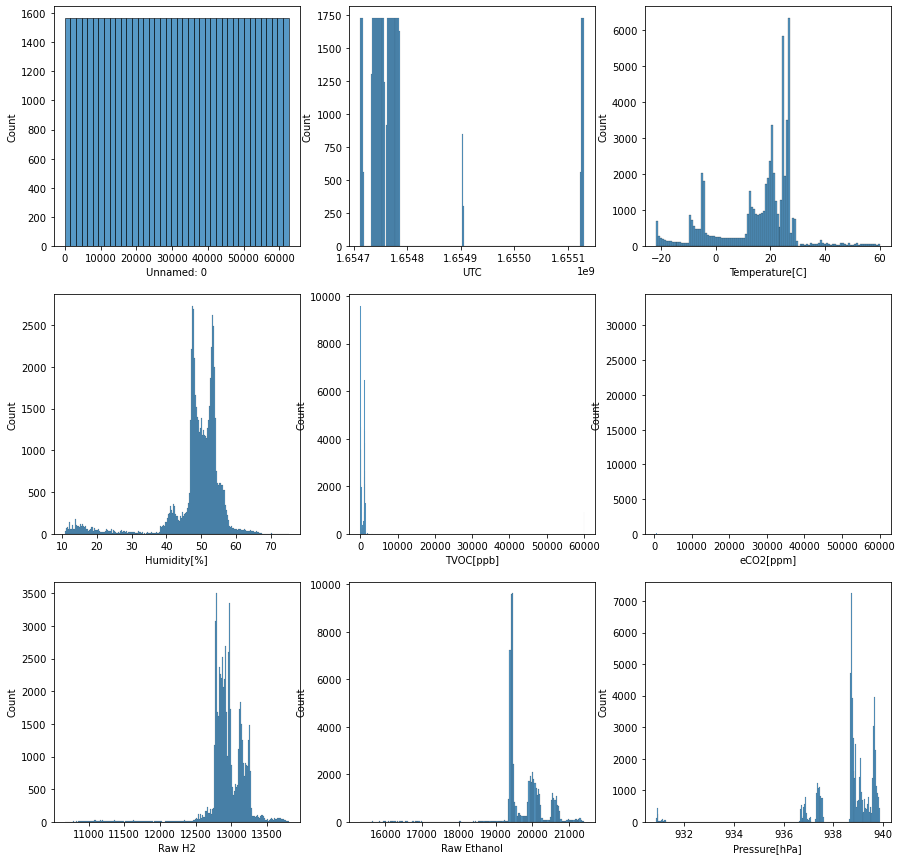

In [39]:
cols = 3
rows = 3
num_cols = smoke_df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = smoke_df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<AxesSubplot:xlabel='TVOC[ppb]', ylabel='Density'>

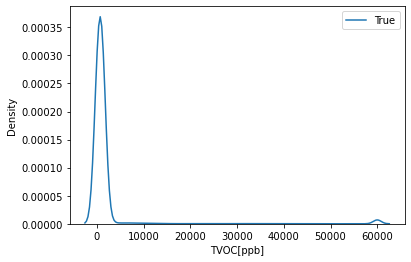

In [43]:
# 2. KDE PLOT - Kernal Density Plot - sns.kdeplot()
sns.kdeplot(x='TVOC[ppb]', data=smoke_df, hue=True)

In [46]:
smoke_df.corr()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
Unnamed: 0,1.000000,0.551987,0.425636,-0.498121,0.248813,0.160665,-0.232854,0.083094,-0.580829,0.151785,0.128487,0.162053,0.126418,0.100300,-0.053262,-0.361351
UTC,0.551987,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
Temperature[C],0.425636,-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.498121,-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.248813,0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.160665,0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.232854,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,0.083094,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.580829,-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.151785,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552


In [49]:
smoke_df.corr()['Fire Alarm'].sort_values()

UTC              -0.389404
Unnamed: 0       -0.361351
Raw Ethanol      -0.340652
TVOC[ppb]        -0.214743
Temperature[C]   -0.163902
NC0.5            -0.128118
PM1.0            -0.110552
eCO2[ppm]        -0.097006
PM2.5            -0.084916
NC1.0            -0.082828
NC2.5            -0.057707
Raw H2            0.107007
Pressure[hPa]     0.249797
Humidity[%]       0.399846
CNT               0.673762
Fire Alarm        1.000000
Name: Fire Alarm, dtype: float64